# Spam Mail Filtering using multiple ML algorithms

### This notebook will able to differenciate between Ham and Spam mails.
### To start this project we need some important library and required data.

#### Importing a bunch of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score

#### To remove unwanted word from our data we need to download stopword from nltk library

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Loading

#### To begin with, we have imported our required data

In [3]:
#read data in CSV format according to your PC's address
raw_data = pd.read_csv("spam1.csv")

### Data PreProcessing

In [4]:
raw_data.shape

(5171, 4)

In [5]:
raw_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [6]:
dict1 = {"Class":raw_data.label, "Text":raw_data.text}           # extracting Class and Text label from original dataset
data = pd.DataFrame(dict1)       

In [7]:
data.head()

,Class,Text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...


In [8]:
data['numClass'] = data['Class'].map({'ham':0, 'spam':1}) # converting all the ham and spam values to 1 and 0 respectively

# Unique values in target set
print("Unique values in the Class set: ", data.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [9]:
data.head()

,Class,Text,numClass
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [10]:
#Removing stopwords of English
stopset = set(stopwords.words("english"))
print(list(stopset))             # List of stopwords as per nltk library

['they', 'theirs', 'you', 'both', 'during', 'yourself', 'are', 'through', 'do', 'same', 'and', 'will', 'having', 'll', 'just', "shan't", 'few', 'mightn', 'needn', 'until', 'when', 'his', "you'll", 'was', "mightn't", 'me', 'after', 'ours', 'himself', 'out', 'being', 'an', 'd', 'haven', 'very', 'most', "aren't", 'any', 'hasn', "should've", 'above', 'to', 'my', 'of', 'not', 'some', 'their', "haven't", "you're", "needn't", "wouldn't", "you've", 'her', 'yourselves', 'this', 'as', 'with', 'then', 'hers', "that'll", 'who', 'been', 'other', 'whom', 'had', 'against', "doesn't", 'our', 're', "don't", 'what', 'it', 'shan', 'over', 'nor', "hadn't", 'yours', 'in', "couldn't", 'won', "she's", 'into', 'further', 'we', 'ain', 'under', 'below', 'were', 'before', 'where', 'but', 'be', 'aren', 'these', 'those', 'too', 'o', "you'd", 'hadn', 'wouldn', 'doesn', 'all', 'y', 'have', 'between', 'its', 'own', 'him', 'each', 'no', 'am', 'than', 'which', 'more', 'm', 'is', 'while', 't', "mustn't", 'he', 'does', '

In [11]:
data.isnull().sum()   # checking for nnull value

Class       0
Text        0
numClass    0
dtype: int64

In [12]:
data.dropna(inplace=True)            # droppinf of null value if present
data.isnull().sum()

Class       0
Text        0
numClass    0
dtype: int64

In [13]:
# printing number of ham and spam messages in the dataset

ham  = data[data.numClass == 0]
print("Number of ham messages in data set:", ham['Class'].count())

spam = data[data.numClass == 1]
print("Number of spam messages in data set:", spam['Class'].count())

Number of ham messages in data set: 3672
Number of spam messages in data set: 1499


### Initializing CountVectorizer

#### It will take the word count from every mail's text and make a matrix of it as we cannot train our ML model on Textual data. This matrix will help ML algorithm to predict which is spamand which is not.

In [14]:
#Initialising Count Vectorizer
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()


### Splitting of data into Training and Testing part

In [17]:
    
X = vectorizer.fit_transform(data.Text)
# Extract target column 'Class'
y = data.numClass

#Performing test train Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=None)

# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 3619 samples.
Testing set has 1552 samples.




In [18]:
data.numClass

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: numClass, Length: 5171, dtype: int64

In [19]:
data[(data['Class'] == 'spam')]['Class'].count()

1499

In [20]:
data[data["Class"] == 'spam']["Class"].count()

1499

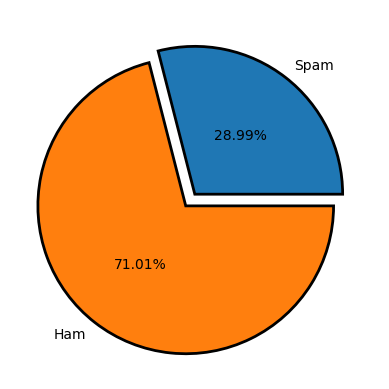

In [21]:
plt.pie([data[(data['Class'] == 'spam')]['Class'].count(), data[(data['Class'] == 'ham')]['Class'].count()], autopct='%0.2f%%', labels=['Spam', "Ham"], pctdistance = 0.5, wedgeprops = {'linewidth': 2, "edgecolor" : "black"}, explode=[0, 0.1])
plt.show()     # Makes a Pie Chart

### Defining function to train and predict labels from classifier

In [22]:
objects = ('Multi-NB','SVM','KNN', 'RF', 'AdaBoost')

def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return(clf.predict(features))

### Defining ML models to different variable

In [23]:
# Initialize the five models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = LinearSVC()
C = KNeighborsClassifier(n_neighbors=1)
D = RandomForestClassifier(n_estimators=100, random_state=None)
E = AdaBoostClassifier(n_estimators=10)


### Finding Performance Matrics to find efficiency of all the ML models

In [24]:
clf = [A,B,C,D,E]
acc_score = [0,0,0,0,0]

# finding the performance score of each model
for a in range(0,5):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")


Multi-NB
Accuracy in %:
98.4536082474227
F1 Score
0.9728506787330317


SVM
Accuracy in %:
96.52061855670104
F1 Score
0.9394618834080717


KNN


c:\users\abhishek sahu\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy in %:
89.2396907216495
F1 Score
0.8236536430834214


RF
Accuracy in %:
97.22938144329896
F1 Score
0.951412429378531


AdaBoost
Accuracy in %:
88.59536082474226
F1 Score
0.8276533592989289




### Bar chart to visualize Accuracy of every model

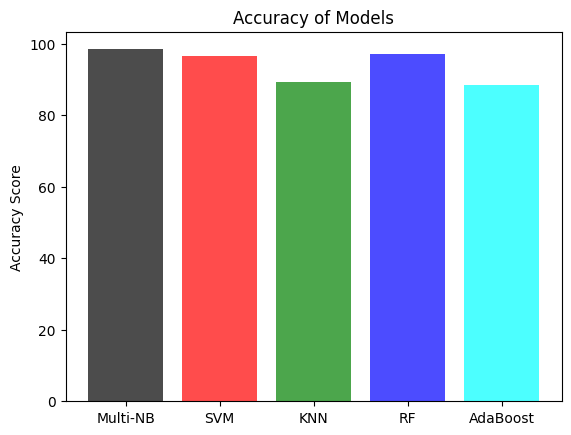

In [25]:
x_pos = np.arange(len(objects))
y_pos = [x*100 for x in acc_score]
plt.bar(x_pos,y_pos, align='center', alpha=0.7, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(x_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()